## Temporal, Correlation and Sentiment Analysis of ChatGPT Subreddit

### A Comparative Study Using Multiple Sentiment Analysis Tools and Correlation Analysis

### REDDIT AUTHENTICATION

In [1]:
# Importing praw package
# Using id and secret from reddit app

import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="sbHLFiorA3Gpufvb-MhHEw",
    client_secret="OLCBrNddm9LH5HCLfyKuEf6uPbtCtg",
    user_agent=user_agent)

### EXTRACTING DATA

In [2]:
import pandas as pd

posts = []
for submission in reddit.subreddit("ChatGPT").top(limit=50000):  # Adjust limit as needed
    posts.append({
        "ID": submission.id,
        "Title": submission.title,
        "Author": str(submission.author),  # Convert to string to handle deleted users
        "Score": submission.score,
        "Created_UTC": submission.created_utc,
        "Upvote_Ratio": submission.upvote_ratio
    })
    
df = pd.DataFrame(posts)

# Display the first few rows of the DataFrame

print(df.head())

        ID                                              Title  \
0  144lfc1               Turned ChatGPT into the ultimate bro   
1  1av10qh                        Will smith is wild for this   
2  13wfaqg  Photoshop AI Generative Fill was used for its ...   
3  14gnv5b  Bing ChatGPT too proud to admit mistake, doubl...   
4  12cobqr      Was curious if GPT-4 could recognize text art   

               Author  Score   Created_UTC  Upvote_Ratio  
0            rich_awo  66383  1.686259e+09          0.95  
1           upupvote2  55176  1.708382e+09          0.85  
2            adesigne  51535  1.685518e+09          0.91  
3     NeedsAPromotion  50638  1.687492e+09          0.95  
4  Outrageous_Bee4464  43758  1.680709e+09          0.98  


### DATE AND TIME CONVERSION

In [3]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Created_UTC' contains Unix timestamps
df['Created_UTC'] = pd.to_datetime(df['Created_UTC'], unit='s')

# Now the 'Created_UTC' column in your DataFrame contains datetime objects
print(df['Created_UTC'].head())

0   2023-06-08 21:16:59
1   2024-02-19 22:37:20
2   2023-05-31 07:25:04
3   2023-06-23 03:41:46
4   2023-04-05 15:39:56
Name: Created_UTC, dtype: datetime64[ns]


### NULL VALUES VERIFICATION

In [4]:
# null value verification

df.isna().sum()

ID              0
Title           0
Author          0
Score           0
Created_UTC     0
Upvote_Ratio    0
dtype: int64

### INFO METHOD

In [5]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            976 non-null    object        
 1   Title         976 non-null    object        
 2   Author        976 non-null    object        
 3   Score         976 non-null    int64         
 4   Created_UTC   976 non-null    datetime64[ns]
 5   Upvote_Ratio  976 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.9+ KB


### TO LOWERCASE

In [6]:
# Columns to lowercase letters

df['Title'] = df['Title'].str.lower()
df['Author'] = df['Author'].str.lower()
df['ID'] = df['ID'].str.lower()

df.head()

,ID,Title,Author,Score,Created_UTC,Upvote_Ratio
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98


### RENAMING COLUMNS 

In [7]:
# Renaming columns 

df = df.rename(columns={'Created_UTC': 'DateTime'})
df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98


### TOKENIZATION

Tokenization is a crucial step in natural language processing, breaking down text into smaller units such as words or phrases. It forms the foundation for various language analysis tasks, from sentiment analysis to machine translation, by providing structured input for computational models.

In [8]:
# Tokenization

import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*',text)
print(tokenize)

<function tokenize at 0x116acbec0>


### STOPWORDS REMOVAL

Stopwords are commonly occurring words in a language (such as "the", "is", "and") that are often filtered out during text preprocessing in natural language processing tasks. Removing stopwords helps to reduce noise and focus on the more meaningful words in a text, improving the efficiency and accuracy of language analysis algorithms.

In [9]:
# Importing the nltk package

import nltk 
stopwords = set(nltk.corpus.stopwords.words('english'))

# Removing stop words

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

### PIPELINE WITH FUNCTIONS

A pipeline with functions is a structured sequence of operations or functions applied to data, typically in software development or data processing workflows. They often include functions for data preprocessing, feature extraction, model training, and evaluation, facilitating efficient and organized development processes.

In [10]:
# Creating a pipeline and prepare function

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

# Using the pipeline

df['Tokens'] = df['Title'].apply(prepare, pipeline=pipeline)

df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]"
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]"
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend..."
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles..."
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]"


### COUNT OF TOKENS

In [11]:
# Token counting 

df['Token_Count'] = df['Tokens'].map(len)
df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens,Token_Count
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]",4
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]",2
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend...",7
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles...",8
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]",6


### HIGHEST FREQUENCY TOKENS

In [12]:
# Most common tokens

from collections import Counter

counter = Counter()
df['Tokens'].map(counter.update)
print('Most Common tokens from the text \n ')
for token, count in counter.most_common(10):
    print(f"{token.upper()} : {count}")

Most Common tokens from the text 
 
CHATGPT : 251
AI : 134
ASKED : 50
GPT : 40
GPT-4 : 30
BING : 29
MAKE : 29
USE : 29
ONE : 28
OPENAI : 26


### TOKEN DISTRIBUTION

Token distribution refers to the frequency or distribution of tokens (individual units such as words or characters) within a given text corpus or dataset. 

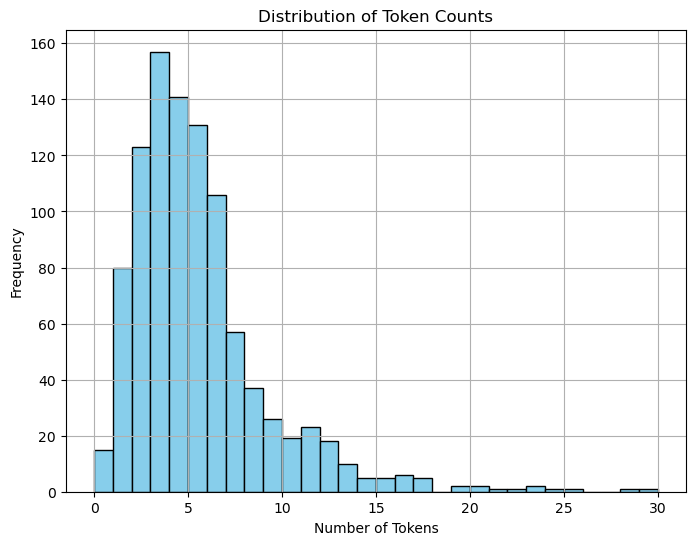

In [13]:
import matplotlib.pyplot as plt

# Assuming df['Tokens'] contains tokenized text data
token_counts = df['Tokens'].apply(len)

# Plotting
plt.figure(figsize=(8,6))
plt.hist(token_counts, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Counts')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## WORDCLOUD

Word clouds are used for their ability to quickly convey the most prevalent terms within a text. <BR>
They highlight word frequency by adjusting the size of each term, allowing audiences to discern patterns and priorities within the data. <BR>
This visual tool enhances presentations, reports, and educational materials by making complex information accessible and engaging. <BR>


### WORDCLOUD - 1

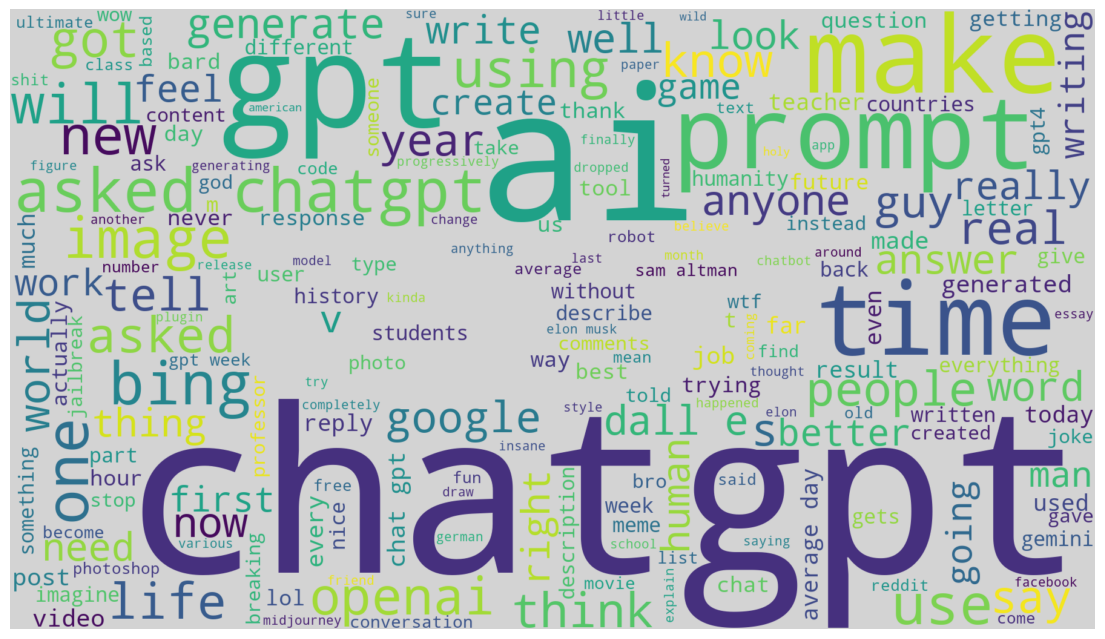

In [14]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Concatenate all tokens into a single string
text = ' '.join(df['Title'])

# Load your custom mask image
mask_image = np.array(Image.open("CHATGPT.webp"))

# Generate the word cloud
wordcloud = WordCloud(
    background_color = 'lightgrey',
    mask = mask_image,
    contour_width = 3,
    contour_color = 'lightgrey',
    stopwords = set(STOPWORDS),# You can add more stopwords here if needed
    max_font_size = 1000,         # Adjust font size to make words larger
    scale = 1                  # Increase scale for higher resolution
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(14, 18))   # Adjust figure size for a larger display
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WORDCLOUD - 2

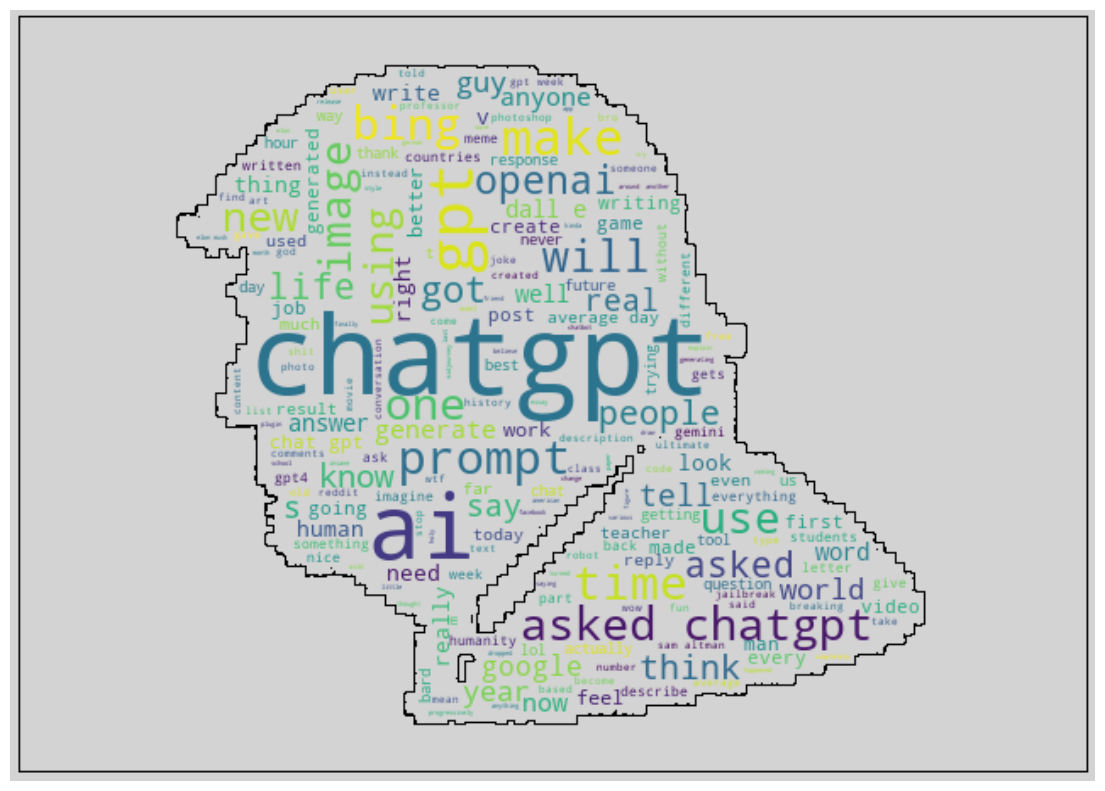

In [15]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Concatenate all tokens into a single string
text = ' '.join(df['Title'])

# Load your custom mask image
mask_image = np.array(Image.open("trumpmask1.webp"))

# Generate the word cloud
wordcloud = WordCloud(
    background_color = 'lightgrey',
    mask = mask_image,
    contour_width = 1,
    contour_color = 'black',
    stopwords = set(STOPWORDS),# You can add more stopwords here if needed
    max_font_size = 1000,         # Adjust font size to make words larger
    scale = 1                  # Increase scale for higher resolution
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(14, 14))   # Adjust figure size for a larger display
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## SUBJECTIVITY AND POLARITY

Subjectivity quantifies how much personal opinion, emotion, or judgment is expressed in the text, as opposed to factual information. It is typically measured on a scale from 0 to 1s rather than objective facts. 

Polarity measures the sentiment's direction expressed in the text. It is a numerical value typically ranging from -1 to 1. 1 represents a completely negative sentiment. 0 represents a neutral sentiment and 1 represents a completely positive sentiment.

In [16]:
# Using Textblob

from textblob import TextBlob

# Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get Polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Columns for subjectivity and polarity

df['Subjectivity'] = df['Title'].apply(getSubjectivity)
df['Polarity'] = df['Title'].apply(getPolarity)

df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens,Token_Count,Subjectivity,Polarity
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]",4,1.000000,0.000000
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]",2,0.400000,0.100000
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend...",7,0.000000,0.000000
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles...",8,0.644444,0.322222
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]",6,1.000000,-0.100000


### POLARITY CATEGORIES

1: This indicates extremely negative sentiment. <BR>
0: This suggests neutral sentiment. It could be factual information, general statements, or descriptions without emotional connotations. <BR>
1: This signifies very positive sentiment. 

In [17]:
# Polarity Categories

def getCategory(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Category"] = df["Polarity"].apply(getCategory)

df.head(5)

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens,Token_Count,Subjectivity,Polarity,Category
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]",4,1.000000,0.000000,Neutral
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]",2,0.400000,0.100000,Positive
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend...",7,0.000000,0.000000,Neutral
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles...",8,0.644444,0.322222,Positive
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]",6,1.000000,-0.100000,Negative


### GRAPH DEPICTING POLARITY AND SUBJECTIVITY

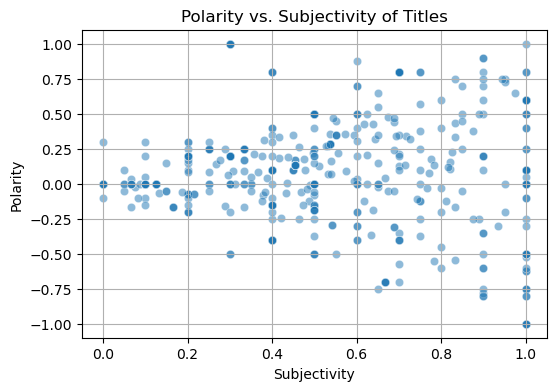

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame is named 'df' and has 'Subjectivity' and 'Polarity' columns

# Creating the scatter plot
plt.figure(figsize=(6, 4))  # Set the figure size
sns.scatterplot(x='Subjectivity', y='Polarity', data=df, alpha=0.5)  # Plot with semi-transparent points

plt.title('Polarity vs. Subjectivity of Titles')  # Title of the plot
plt.xlabel('Subjectivity')                        # X-axis label
plt.ylabel('Polarity')                            # Y-axis label
plt.grid(True)                                    # Show grid
plt.show()

## BINGLIU SCORING 

The Bing Liu lexicon, a specific approach that relies on a pre-compiled list of positive and negative words is employed. This method involves counting the occurrences of words that are labeled as positive or negative according to the lexicon and then determining the overall sentiment based on the balance of these occurrences. 

The Bing Liu lexicon is particularly useful for tasks where a straightforward positive/negative sentiment dichotomy is applicable.

In [19]:
# Importing required packages for bigliu scoring

import nltk
from sklearn import preprocessing
from nltk.corpus import opinion_lexicon                     
from nltk.tokenize import word_tokenize

### DICTIONARY 

In [20]:
# Initializing Scores

positive_score = 1
negative_score = -1

#  Let's create a dictionary and add positive and negative words to the dictionary

word_dict = {}

for word in opinion_lexicon.positive():
        word_dict[word] = positive_score
        
for word in opinion_lexicon.negative():
        word_dict[word] = negative_score

### BINGLIU FUNCTION AND SCORES

In [21]:
# Bingliu Function and scores

def calculate_sentiment(tokens):
    score = 0
    for token in tokens:
        if token in word_dict:
            score += word_dict[token]
    return score


# If 'Tokens' are already in list format
df['bingliu_score'] = df['Tokens'].apply(calculate_sentiment)

df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens,Token_Count,Subjectivity,Polarity,Category,bingliu_score
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]",4,1.000000,0.000000,Neutral,0
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]",2,0.400000,0.100000,Positive,-1
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend...",7,0.000000,0.000000,Neutral,0
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles...",8,0.644444,0.322222,Positive,-1
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]",6,1.000000,-0.100000,Negative,0


## VADER ALGORITHM

The VADER (Valence Aware Dictionary and sEntiment Reasoner) algorithm is a lexicon and rule-based sentiment analysis tool designed to understand sentiments expressed in social media texts. <BR>
VADER considers both individual words and their context to determine sentiment polarity. <br>

It assigns polarity scores ranging from -1 (most negative) to +1 (most positive), along with intensity scores. <br>


In [22]:
# Add VADER sentiment compound score for each title in the dataframe and add the scores as a new column.

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming df is your DataFrame and 'title' is the column with the text
sia = SentimentIntensityAnalyzer()

# Apply VADER and create a new column with the compound scores
df['vader_Score'] = df['Title'].apply(lambda x: sia.polarity_scores(x)['compound'])

df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens,Token_Count,Subjectivity,Polarity,Category,bingliu_score,vader_Score
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]",4,1.000000,0.000000,Neutral,0,0.0000
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]",2,0.400000,0.100000,Positive,-1,0.0000
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend...",7,0.000000,0.000000,Neutral,0,0.0000
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles...",8,0.644444,0.322222,Positive,-1,-0.2732
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]",6,1.000000,-0.100000,Negative,0,0.3182


### GRAPH FOR VADER SCORING

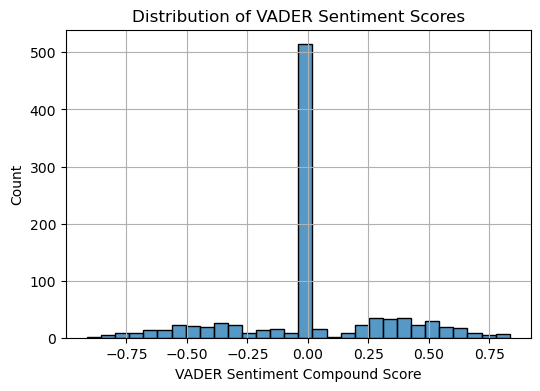

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame is named 'scores_df' and has the 'vader_Score' column

# Creating the histogram
plt.figure(figsize=(6, 4))  # Set the figure size
sns.histplot(df['vader_Score'], bins=30, kde=False)  # Plot with 30 bins

plt.title('Distribution of VADER Sentiment Scores')  # Title of the plot
plt.xlabel('VADER Sentiment Compound Score')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.grid(True)  # Show grid
plt.show()

## TEXT BLOB

TextBlob is a Python library for processing textual data, including tasks like sentiment analysis, part-of-speech tagging, noun phrase extraction. <br>
TextBlob utilizes NLTK and Pattern libraries under the hood, making it a powerful tool for NLP tasks and provides a simple API for diving into common Natural language processing tasks. <br>

In [24]:
# Add textBlob sentiment polarity score for each title in the dataframe and add the scores as a new column.

from textblob import TextBlob
df['textblob_Score'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)\

df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens,Token_Count,Subjectivity,Polarity,Category,bingliu_score,vader_Score,textblob_Score
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]",4,1.000000,0.000000,Neutral,0,0.0000,0.000000
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]",2,0.400000,0.100000,Positive,-1,0.0000,0.100000
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend...",7,0.000000,0.000000,Neutral,0,0.0000,0.000000
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles...",8,0.644444,0.322222,Positive,-1,-0.2732,0.322222
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]",6,1.000000,-0.100000,Negative,0,0.3182,-0.100000


### GRAPH FOR TEXT BLOB SCORING 

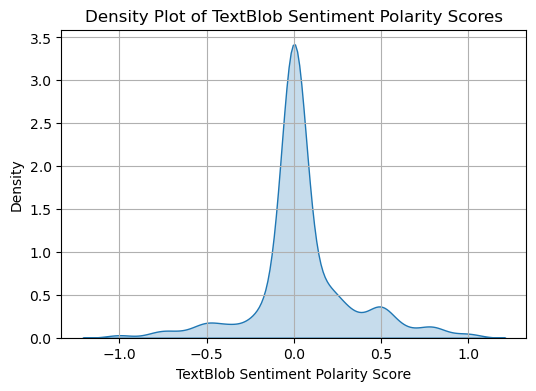

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Ensure your DataFrame is named 'scores_df' and has the 'textblob_Score' column

# Creating the density plot
plt.figure(figsize=(6, 4))  # Set the figure size
sns.kdeplot(df['textblob_Score'], shade = True)  # Shade under the curve

plt.title('Density Plot of TextBlob Sentiment Polarity Scores')  # Title of the plot
plt.xlabel('TextBlob Sentiment Polarity Score')  # X-axis label
plt.ylabel('Density')  # Y-axis label
plt.grid(True)  # Show grid
plt.show()

## AFINN ALGORITHM

The AFINN (Affective Norms for English Words) algorithm is another widely used sentiment analysis tool. <br>
It's a simple yet effective approach that assigns pre-computed sentiment scores to individual words in a lexicon. <br>
AFINN contains a list of words along with their associated polarity scores, ranging from -5 (most negative) to +5 (most positive), with 0 indicating neutrality.

In [26]:
# Add AFINN sentiment score for each title in the dataframe and add the scores as a new column.

from afinn import Afinn

afinn = Afinn()
df['afinn_score'] = df['Title'].apply(lambda x: afinn.score(x))\

df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens,Token_Count,Subjectivity,Polarity,Category,bingliu_score,vader_Score,textblob_Score,afinn_score
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]",4,1.000000,0.000000,Neutral,0,0.0000,0.000000,0.0
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]",2,0.400000,0.100000,Positive,-1,0.0000,0.100000,0.0
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend...",7,0.000000,0.000000,Neutral,0,0.0000,0.000000,0.0
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles...",8,0.644444,0.322222,Positive,-1,-0.2732,0.322222,-3.0
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]",6,1.000000,-0.100000,Negative,0,0.3182,-0.100000,1.0


### GRAPH FOR AFINN SCORING

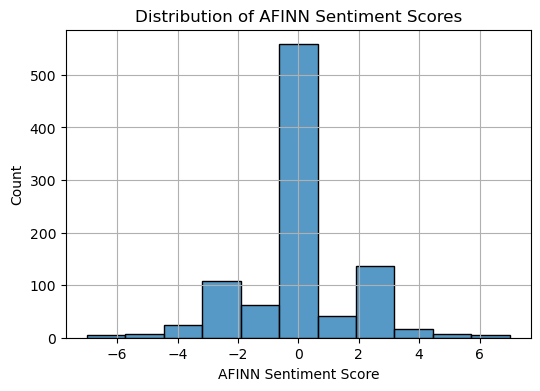

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your DataFrame is named 'scores_df' and it includes the 'afinn_score' column.

# Creating the histogram
plt.figure(figsize=(6, 4))  # Set the figure size
sns.histplot(df['afinn_score'], bins=11, kde=False)  # Specify bins to cover the range of AFINN scores

plt.title('Distribution of AFINN Sentiment Scores')  # Title of the plot
plt.xlabel('AFINN Sentiment Score')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.grid(True)  # Show grid
plt.show()

## SENTICNET ALGORITHM

SenticNet is a semantic resource that associates concepts with affective information, including polarity, intensity, and semantic relatedness. <br>
It's essentially a knowledge base that links words and concepts to their associated sentiments.

In [28]:
# Add senticNet sentiment score for each word in the text and compute the average score. Then, add the sentiment scores to the dataframe.

import pandas as pd
from senticnet.senticnet import SenticNet

sn = SenticNet()
def senticnet_score(text):
    words = text.split()
    sentiment_scores = [float(sn.polarity_value(word.lower())) if word.lower() in sn.data else 0 for word in words]
    if sentiment_scores:
        sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
    else:
        sentiment_score = 0  
    return sentiment_score

df['senticnet_score'] = df['Title'].apply(senticnet_score)

df.head()

,ID,Title,Author,Score,DateTime,Upvote_Ratio,Tokens,Token_Count,Subjectivity,Polarity,Category,bingliu_score,vader_Score,textblob_Score,afinn_score,senticnet_score
0,144lfc1,turned chatgpt into the ultimate bro,rich_awo,66383,2023-06-08 21:16:59,0.95,"[turned, chatgpt, ultimate, bro]",4,1.000000,0.000000,Neutral,0,0.0000,0.000000,0.0,0.031000
1,1av10qh,will smith is wild for this,upupvote2,55176,2024-02-19 22:37:20,0.85,"[smith, wild]",2,0.400000,0.100000,Positive,-1,0.0000,0.100000,0.0,0.301667
2,13wfaqg,photoshop ai generative fill was used for its ...,adesigne,51535,2023-05-31 07:25:04,0.91,"[photoshop, ai, generative, fill, used, intend...",7,0.000000,0.000000,Neutral,0,0.0000,0.000000,0.0,0.076700
3,14gnv5b,"bing chatgpt too proud to admit mistake, doubl...",needsapromotion,50638,2023-06-23 03:41:46,0.95,"[bing, chatgpt, proud, admit, mistake, doubles...",8,0.644444,0.322222,Positive,-1,-0.2732,0.322222,-3.0,0.013077
4,12cobqr,was curious if gpt-4 could recognize text art,outrageous_bee4464,43758,2023-04-05 15:39:56,0.98,"[curious, gpt-4, could, recognize, text, art]",6,1.000000,-0.100000,Negative,0,0.3182,-0.100000,1.0,0.120875


### GRAPH FOR SENTICNET SCORING

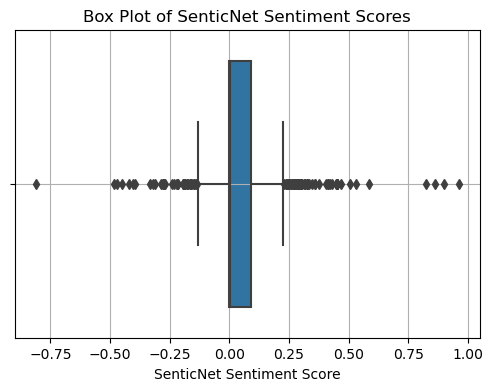

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame is named 'scores_df' and includes the 'senticnet_score' column

# Creating the box plot
plt.figure(figsize=(6,4))  # Set the figure size
sns.boxplot(x=df['senticnet_score'])

plt.title('Box Plot of SenticNet Sentiment Scores')  # Title of the plot
plt.xlabel('SenticNet Sentiment Score')  # X-axis label
plt.grid(True)  # Show grid
plt.show()

### SUB PLOTS SHOWING SENTIMENT SCORES 

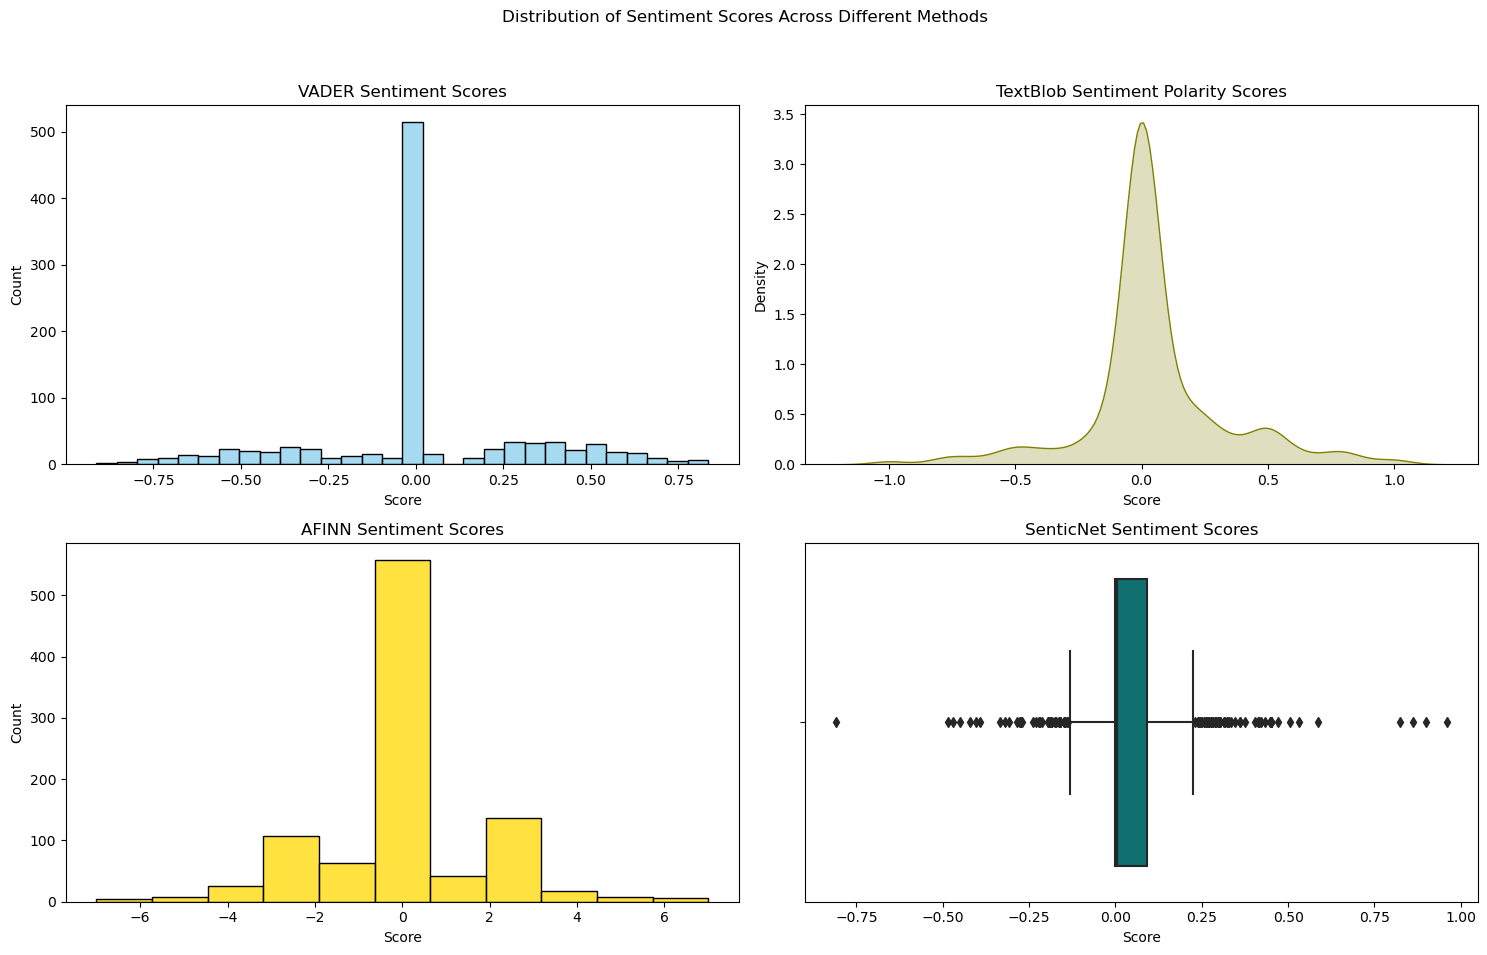

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  
fig.suptitle('Distribution of Sentiment Scores Across Different Methods')

# VADER Scores Histogram
sns.histplot(df['vader_Score'], bins=30, kde=False, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('VADER Sentiment Scores')
axs[0, 0].set_xlabel('Score')
axs[0, 0].set_ylabel('Count')

# TextBlob Scores Density Plot
sns.kdeplot(df['textblob_Score'], shade=True, ax=axs[0, 1], color='olive')
axs[0, 1].set_title('TextBlob Sentiment Polarity Scores')
axs[0, 1].set_xlabel('Score')
axs[0, 1].set_ylabel('Density')

# AFINN Scores Histogram
sns.histplot(df['afinn_score'], bins=11, kde=False, ax=axs[1, 0], color='gold')
axs[1, 0].set_title('AFINN Sentiment Scores')
axs[1, 0].set_xlabel('Score')
axs[1, 0].set_ylabel('Count')

# SenticNet Scores Box Plot
sns.boxplot(x=df['senticnet_score'], ax=axs[1, 1], color='teal')
axs[1, 1].set_title('SenticNet Sentiment Scores')
axs[1, 1].set_xlabel('Score')
axs[1, 1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

## F1 SCORING FOR ALGORITHMS

F1 scoring is a common metric used to evaluate the performance of algorithms, especially in tasks like text classification and sentiment analysis. <BR>
It balances precision and recallinto a single score, making it effective for assessing overall model accuracy. <BR>
A higher F1 score indicates better performance in capturing both precision and recall to measure of algorithm effectiveness. <BR>

In [31]:
from sklearn.metrics import f1_score

# Create a temporary DataFrame
temp_df = df.copy()  # Make a copy of the original DataFrame

# Step 1: Convert float sentiment scores to binary labels
temp_df['vader_label'] = temp_df['vader_Score'].apply(lambda x: 1 if x > 0 else 0)
temp_df['textblob_label'] = temp_df['textblob_Score'].apply(lambda x: 1 if x > 0 else 0)
temp_df['afinn_label'] = temp_df['afinn_score'].apply(lambda x: 1 if x > 0 else 0)
temp_df['senticnet_label'] = temp_df['senticnet_score'].apply(lambda x: 1 if x > 0 else 0)

# Step 2: Calculate F1 score for Bing Liu's sentiment category
bingliu_true_labels = temp_df['Category'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})
bingliu_f1 = f1_score(bingliu_true_labels, temp_df['bingliu_score'], average='weighted')

# Step 3: Calculate F1 scores for other sentiment analysis algorithms
vader_f1 = f1_score(bingliu_true_labels, temp_df['vader_label'], average='weighted')
textblob_f1 = f1_score(bingliu_true_labels, temp_df['textblob_label'], average='weighted')
afinn_f1 = f1_score(bingliu_true_labels, temp_df['afinn_label'], average='weighted')
senticnet_f1 = f1_score(bingliu_true_labels, temp_df['senticnet_label'], average='weighted')

# Print F1 scores
print("F1 score for Bing Liu's sentiment category:", bingliu_f1)
print("F1 score for VADER:", vader_f1)
print("F1 score for TextBlob:", textblob_f1)
print("F1 score for AFINN:", afinn_f1)
print("F1 score for SenticNet:", senticnet_f1)

F1 score for Bing Liu's sentiment category: 0.5640845752321727
F1 score for VADER: 0.5461694784308557
F1 score for TextBlob: 0.7618845838078339
F1 score for AFINN: 0.5399649169837931
F1 score for SenticNet: 0.4896736911090365


### GRAPH FOR F1 SCORING OF ALGORITHMS

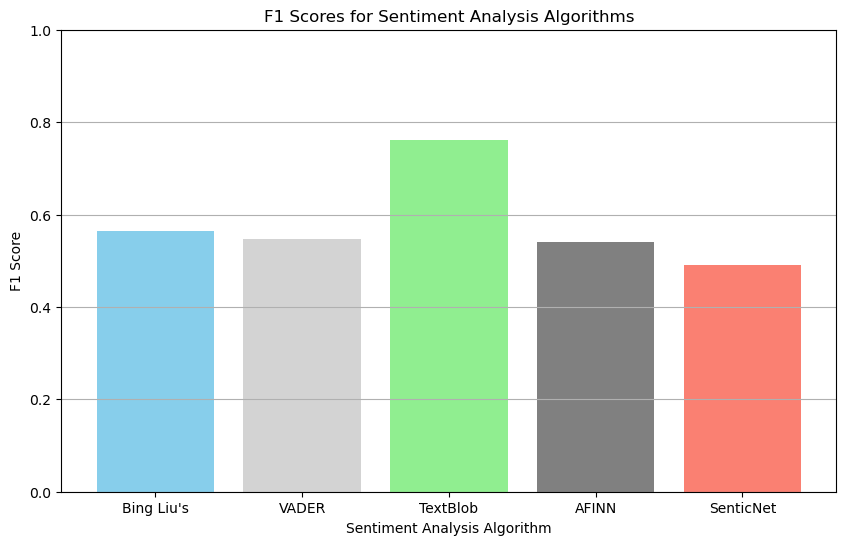

In [32]:
import matplotlib.pyplot as plt

# F1 scores
f1_scores = {
    "Bing Liu's": bingliu_f1,
    "VADER": vader_f1,
    "TextBlob": textblob_f1,
    "AFINN": afinn_f1,
    "SenticNet": senticnet_f1
}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['skyblue', 'lightgrey', 'lightgreen', 'grey', 'salmon'])
plt.xlabel('Sentiment Analysis Algorithm')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Sentiment Analysis Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistency
plt.grid(axis='y')
plt.show()

## CORRELATION ANALYSIS

### SENTIMENT SCORES VS ENGAGEMENT METRICS

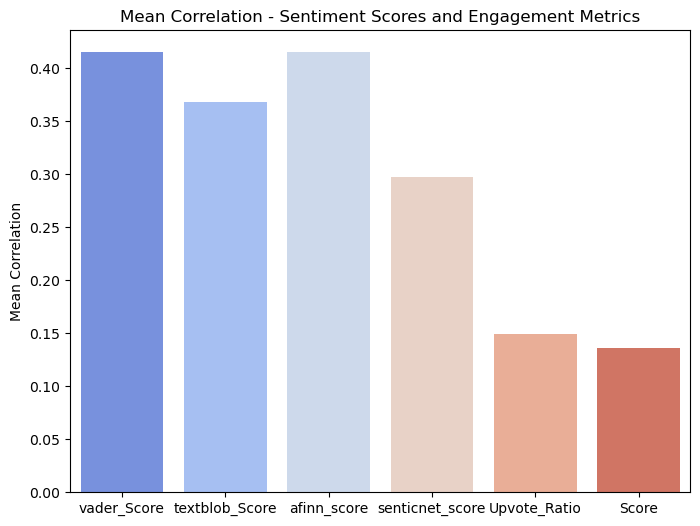

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

one_df = df.copy()

# Compute mean correlations
mean_correlations = one_df[['vader_Score', 'textblob_Score', 'afinn_score', 'senticnet_score', 'Upvote_Ratio', 'Score']].corr().mean()

# Plot barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_correlations.index, y=mean_correlations.values, palette='coolwarm')
plt.title('Mean Correlation - Sentiment Scores and Engagement Metrics')
plt.xticks(rotation = 0)
plt.ylabel('Mean Correlation')
plt.show()

### SENTIMENT SCORES AND TEXT COMPLEXITY

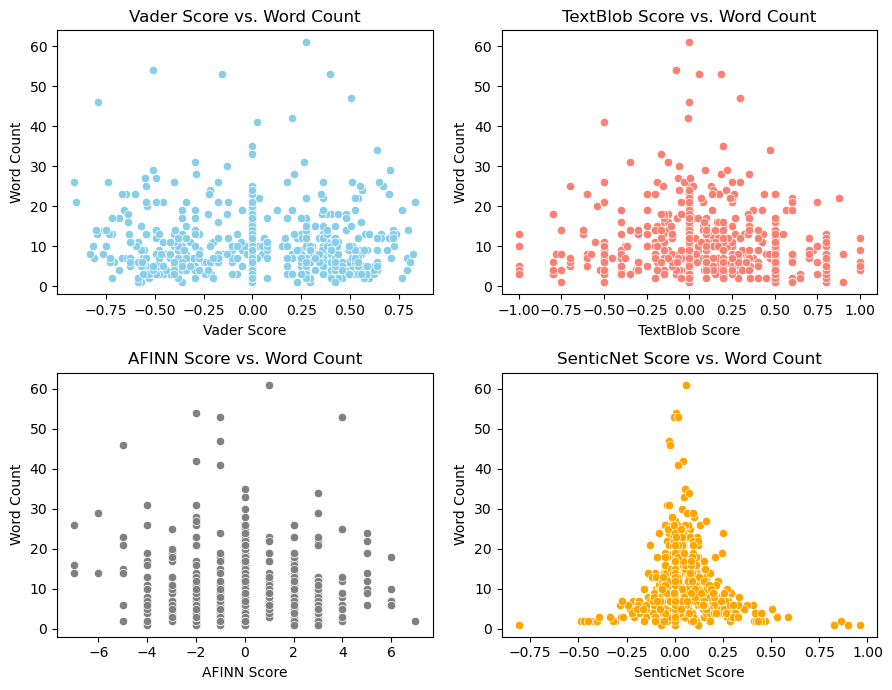

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'vader_Score' as sentiment score
# Calculate word count as a proxy for text complexity
one_df['Word_Count'] = one_df['Title'].apply(lambda x: len(x.split()))

# Create subplots for each scatter plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))

# Scatter plot for Vader Score and Word Count
sns.scatterplot(data=one_df, x='vader_Score', y='Word_Count', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Vader Score vs. Word Count')
axes[0, 0].set_xlabel('Vader Score')
axes[0, 0].set_ylabel('Word Count')

# Scatter plot for TextBlob Score and Word Count
sns.scatterplot(data=one_df, x='textblob_Score', y='Word_Count', color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('TextBlob Score vs. Word Count')
axes[0, 1].set_xlabel('TextBlob Score')
axes[0, 1].set_ylabel('Word Count')

# Scatter plot for AFINN Score and Word Count
sns.scatterplot(data=one_df, x='afinn_score', y='Word_Count', color='grey', ax=axes[1, 0])
axes[1, 0].set_title('AFINN Score vs. Word Count')
axes[1, 0].set_xlabel('AFINN Score')
axes[1, 0].set_ylabel('Word Count')

# Scatter plot for SenticNet Score and Word Count
sns.scatterplot(data=one_df, x='senticnet_score', y='Word_Count', color='orange', ax=axes[1, 1])
axes[1, 1].set_title('SenticNet Score vs. Word Count')
axes[1, 1].set_xlabel('SenticNet Score')
axes[1, 1].set_ylabel('Word Count')

plt.tight_layout()
plt.show()

## TEMPORAL ANALYSIS

Temporal analysis involves examining data over time to identify patterns, trends, and fluctuations. <BR> By analyzing temporal data, one can gain insights into how variables change over specific periods, detect seasonality, and understand the impact of time on various phenomena. <BR> It helps in making informed decisions, forecasting future outcomes, and understanding the dynamics of evolving systems.

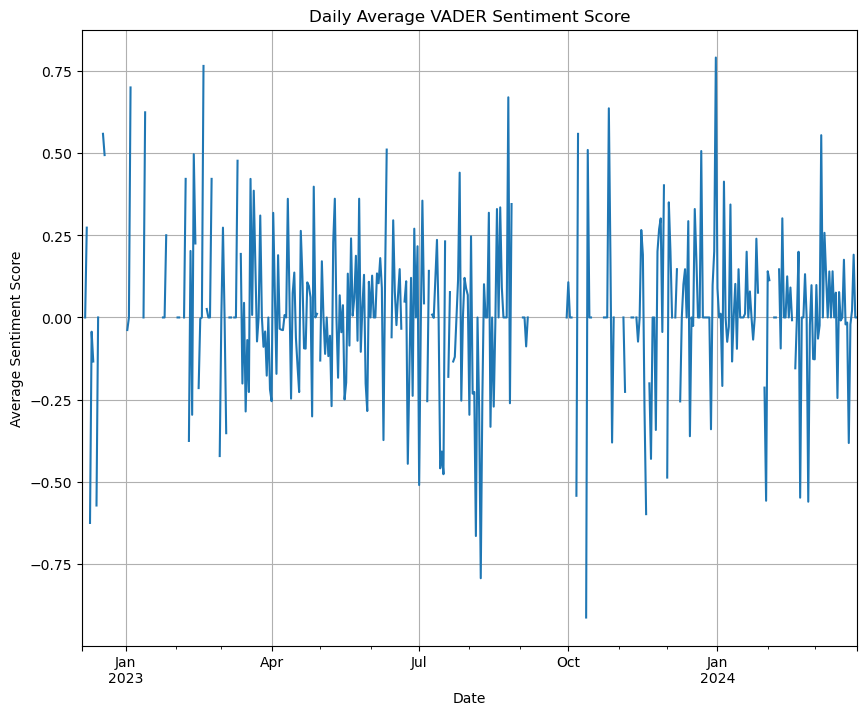

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a copy of scores_df to keep the original unchanged
temp_df = df.copy()

# Ensure DateTime is in datetime format
temp_df['DateTime'] = pd.to_datetime(temp_df['DateTime'])

# Set DateTime as the index
temp_df.set_index('DateTime', inplace=True)

# Resample data to daily averages
daily_avg_vader = temp_df['vader_Score'].resample('D').mean()

# Plotting
plt.figure(figsize=(10, 8))
daily_avg_vader.plot(title='Daily Average VADER Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()